# Music Recommendation System
Welcome to My Machine Learning Project!
The goal of this project is to build a machine learning-based recommendation system that predicts 
whether a user will replay a song within a month. The system learns from user listening history and
timestamps to generate personalized song recommendations.

## Steps Covered:
- Data Loading & Preprocessing
- Exploratory Data Analysis (EDA)
- Feature Engineering
- Model Training & Evaluation
- Hyperparameter Tuning
- Alternative Model Testing
- Recommendation Function

### How it Works:
- Analyzes user listening history 📊  
- Uses timestamps & song metadata ⏳🎵  
- Trains a machine learning model to predict **repeat plays** 🎯
### Why is this Important?
This system helps music streaming platforms **personalize recommendations**, improving user experience and engagement.  

# Step 1: Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Step 2: Load & Explore Dataset

In [3]:
import pandas as pd
df = pd.read_csv('spotify_data.csv')
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Displaying Last few rows

In [64]:
df.tail()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.235,...,-16.393,1,0.0422,0.640,0.928,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.117,...,-18.318,0,0.0401,0.994,0.976,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.329,...,-10.895,0,0.0420,0.867,0.000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.506,...,-10.889,1,0.0297,0.381,0.000,0.2700,0.4130,135.960,4,world-music
113999,113999,2hETkH7cOfqmz3LqZDHZf5,Cesária Evora,Miss Perfumado,Barbincor,22,241826,False,0.526,0.487,...,-10.204,0,0.0725,0.681,0.000,0.0893,0.7080,79.198,4,world-music


# Step 3: Preprocessing

## Shape of dataset

In [66]:
df.shape

(114000, 21)

## Info of Dataset

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

## Displaying Columns Name

In [70]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Removing unnecessary column

In [72]:
df = df.drop(columns=['Unnamed: 0'])
df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

## Find and Replace Null values

In [74]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Remove missing values (NaN):

In [76]:
df = df.dropna()  
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           113999 

## Check for missing values

In [78]:
df.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

## Before Dropping Duplicates

In [102]:
df.duplicated().sum()   # Before Dropping Duplicates,Check for Them,If the output is greater than 0, 
                        # then duplicates exist and should be removed,here the df is unique.

0

# Step 3: Exploratory Data Analysis (EDA)
 Data Visualization

## Top 10 most played artists:

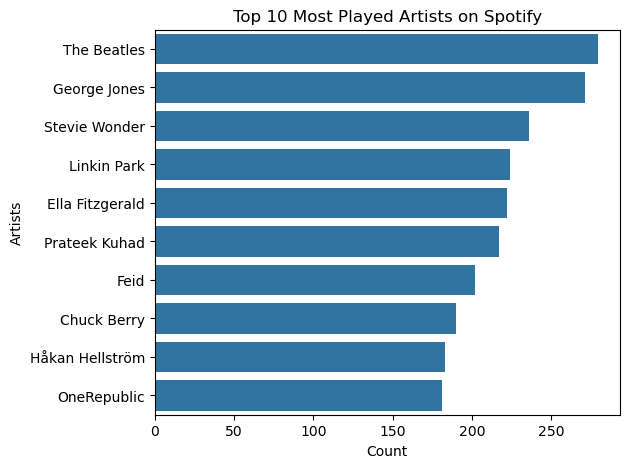

artists
The Beatles        279
George Jones       271
Stevie Wonder      236
Linkin Park        224
Ella Fitzgerald    222
Prateek Kuhad      217
Feid               202
Chuck Berry        190
Håkan Hellström    183
OneRepublic        181
Name: count, dtype: int64

In [138]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for better visualization

# Set the figure size to 6 inches wide and 5 inches tall
plt.figure(figsize=(6, 5))

# Get the top 10 most played artists from the dataset
top_artists = df['artists'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 artists
sns.barplot(y=top_artists.index, x=top_artists.values)

# Set the title of the chart
plt.title("Top 10 Most Played Artists on Spotify")

# Label the x-axis (number of plays)
plt.xlabel("Count")

# Label the y-axis (artist names)
plt.ylabel("Artists")

# Display the chart
plt.show()

# Print the top 10 artists with their play counts
top_artists


## Artists with the Highest Average Popularity (Score ≥ 70):

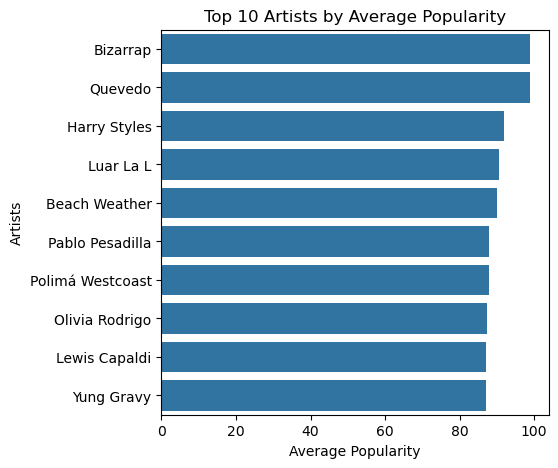

artists
Bizarrap            99.0
Quevedo             99.0
Harry Styles        92.0
Luar La L           90.5
Beach Weather       90.0
Pablo Pesadilla     88.0
Polimá Westcoast    88.0
Olivia Rodrigo      87.4
Lewis Capaldi       87.0
Yung Gravy          87.0
Name: popularity, dtype: float64


In [151]:
# Create a copy of the original DataFrame to avoid modifying the original dataset
copy_df = df.copy()

# Split the 'artists' column where multiple artists are separated by a semicolon (';')
copy_df['artists'] = copy_df['artists'].str.split(';')

# Expand the DataFrame so that each artist appears in a separate row
copy_df = copy_df.explode('artists')

# Group by artist name and calculate the average popularity for each artist
top_artists = copy_df.groupby('artists')['popularity'].mean()

# Filter artists with an average popularity score of 70 or more and sort in descending order
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)

# Select the top 10 artists based on average popularity
top_artists_top10 = top_artists[:10]

# Set figure size for better visualization
plt.figure(figsize=(5, 5))

# Create a bar plot showing the top 10 artists by average popularity
sns.barplot(x=top_artists_top10.values, y=top_artists_top10.index)

# Set the title and axis labels for the plot
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Average Popularity')
plt.ylabel('Artists')

# Display the plot
plt.show()

# Print the top 10 artists with their average popularity scores
print(top_artists_top10)


## Top 10 most played albums:

What This Code Does?
✅ Extracts the top 10 most played albums
✅ Counts occurrences of each album in the dataset
✅ Sorts the albums by frequency
✅ Visualizes the top 10 using a bar chart

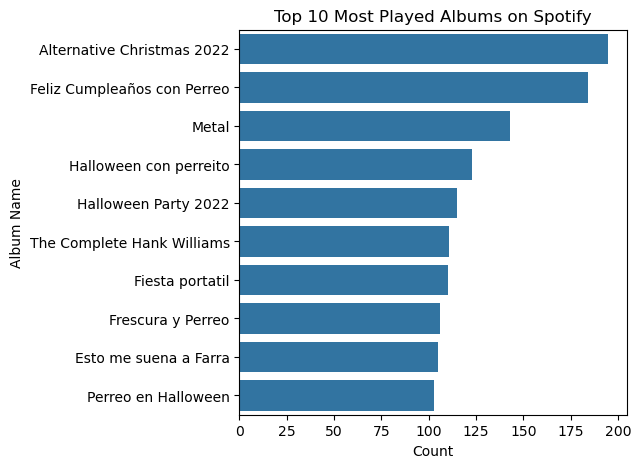

album_name
Alternative Christmas 2022     195
Feliz Cumpleaños con Perreo    184
Metal                          143
Halloween con perreito         123
Halloween Party 2022           115
The Complete Hank Williams     111
Fiesta portatil                110
Frescura y Perreo              106
Esto me suena a Farra          105
Perreo en Halloween            103
Name: count, dtype: int64

In [149]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for better visualization

# Set the figure size for better readability
plt.figure(figsize=(5, 5))

# Get the top 10 most frequently played albums from the dataset
top_albums = df['album_name'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 albums
sns.barplot(y=top_albums.index, x=top_albums.values)

# Set the title of the chart
plt.title("Top 10 Most Played Albums on Spotify")

# Label the x-axis (number of times the album appears in the dataset)
plt.xlabel("Count")

# Label the y-axis (album names)
plt.ylabel("Album Name")

# Display the chart
plt.show()

# Print the top 10 albums with their play counts
top_albums


## Top 10 Most Played Tracks:

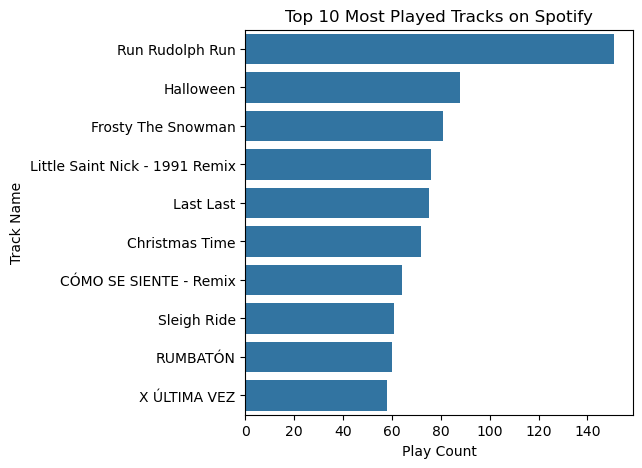

track_name
Run Rudolph Run                   151
Halloween                          88
Frosty The Snowman                 81
Little Saint Nick - 1991 Remix     76
Last Last                          75
Christmas Time                     72
CÓMO SE SIENTE - Remix             64
Sleigh Ride                        61
RUMBATÓN                           60
X ÚLTIMA VEZ                       58
Name: count, dtype: int64

In [154]:
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
import seaborn as sns  # Import Seaborn for better visualization

# Set the figure size for better readability
plt.figure(figsize=(5, 5))

# Get the top 10 most frequently played tracks from the dataset
top_tracks = df['track_name'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 tracks
sns.barplot(y=top_tracks.index, x=top_tracks.values)

# Set the title of the chart
plt.title("Top 10 Most Played Tracks on Spotify")

# Label the x-axis (number of times the track appears in the dataset)
plt.xlabel("Play Count")

# Label the y-axis (track names)
plt.ylabel("Track Name")

# Display the chart
plt.show()

# Print the top 10 tracks with their play counts
top_tracks


## 🎵 What Are Genres?
A music genre is a category that identifies a piece of music as belonging to a specific style, form, or tradition.
Genres help classify music based on similar characteristics such as rhythm, melody, instruments, and cultural influence.
## Why Are Genres Important?
- Help music discovery (Spotify recommends songs based on genre).
- Allow listeners to find music that fits their mood.
- Used in machine learning for music recommendation systems.
- Influence cultural trends and identities.

## Visualizing Top 10 Genres:

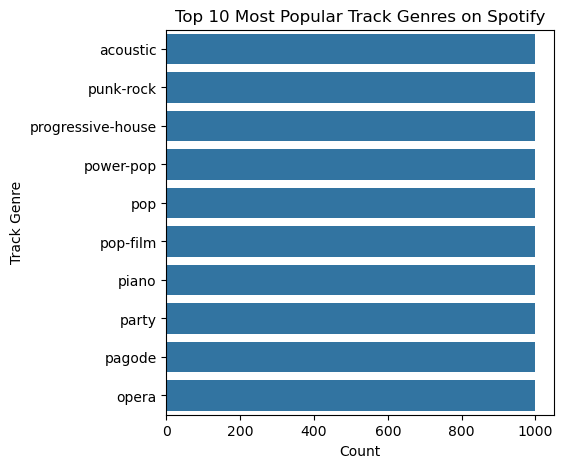

track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
pop-film             1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: count, dtype: int64

In [170]:
# Set the figure size to make the graph more readable
plt.figure(figsize=(5, 5))

# Get the top 10 most common track genres from the dataset
top_genres = df['track_genre'].value_counts().nlargest(10)

# Create a bar plot to visualize the top 10 track genres
sns.barplot(y=top_genres.index, x=top_genres.values)

# Set the title of the chart
plt.title("Top 10 Most Popular Track Genres on Spotify")

# Label the x-axis to indicate the count of occurrences
plt.xlabel("Count")

# Label the y-axis to indicate the genre names
plt.ylabel("Track Genre")

# Display the bar chart
plt.show()

# Print the top 10 genres with their counts
top_genres


## Analyzing the Top 10 Genres with Highest Average Popularity:

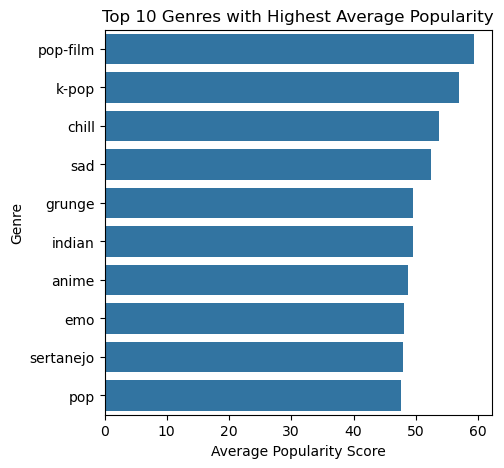

,track_genre,popularity
81,pop-film,59.283
65,k-pop,56.896
15,chill,53.651
94,sad,52.379
44,grunge,49.594
55,indian,49.539
5,anime,48.772
33,emo,48.128
97,sertanejo,47.866
80,pop,47.576


In [175]:
# Group the dataset by 'track_genre' and calculate the average popularity for each genre
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

# Select the top 10 genres with the highest average popularity
top10_popular_genres = avg_popularity_by_genre.nlargest(10, 'popularity')

# Set the figure size for better visualization
plt.figure(figsize=(5, 5))

# Create a bar plot to visualize the top 10 genres by average popularity
sns.barplot(x='popularity', y='track_genre', data=top10_popular_genres)

# Set the title of the plot
plt.title('Top 10 Genres with Highest Average Popularity')

# Label the x-axis (representing the average popularity score of each genre)
plt.xlabel('Average Popularity Score')

# Label the y-axis (representing different track genres)
plt.ylabel('Genre')

# Display the bar chart
plt.show()

# Print the top 10 genres with their respective average popularity scores
top10_popular_genres


## Analyzing the Top 10 Genres with the Highest Explicit Content Ratio

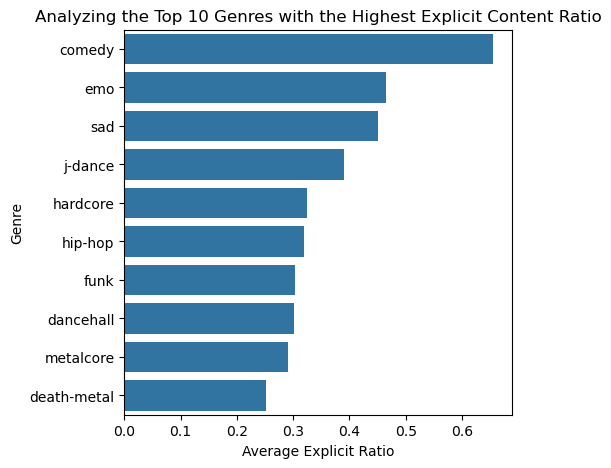

In [183]:
# Group the dataset by 'track_genre' and calculate the average explicit ratio for each genre
explicit_ratio_by_genre = df.groupby('track_genre')['explicit'].mean().reset_index()

# Analyzing the Top 10 Genres with the Highest Explicit Content Ratio
top5_explicit_genres = explicit_ratio_by_genre.nlargest(10, 'explicit')

# Set the figure size for better readability
plt.figure(figsize=(5, 5))

# Create a bar plot to visualize the top 10 genres with the highest explicit content ratio
sns.barplot(x='explicit', y='track_genre', data=top5_explicit_genres)

# Set the title of the chart
plt.title('Analyzing the Top 10 Genres with the Highest Explicit Content Ratio')

# Label the x-axis (representing the average explicit ratio of each genre)
plt.xlabel('Average Explicit Ratio')

# Label the y-axis (representing different track genres)
plt.ylabel('Genre')

# Display the bar chart
plt.show()


## Analyzing the Most Popular Music Genres in the Top 0.1% of Songs

### Objective:

In [ ]:
The objective of this code is to analyze the most popular music genres among the top 0.1% of songs based on their popularity.It does this by:

- Sorting songs by popularity in descending order.
- Selecting the top 0.1% of songs.
- Counting the number of songs per genre in this top segment.
- Identifying the most common genre in the top 0.1%.
- Visualizing the genre distribution using a bar chart.

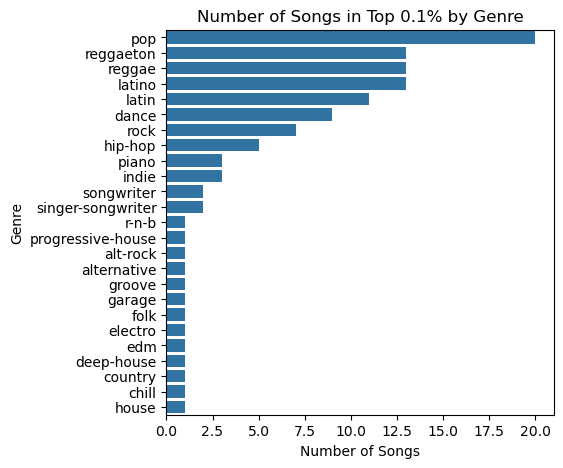

In [21]:
plt.figure(figsize=(5, 5))
sns.barplot(x='count',     # Set the x-axis to 'count' column
            y='track_genre',     # Set the y-axis to 'track_genre' column
            data=top_genres_count)    # Use the dataset 'top_genres_count'
plt.title('Number of Songs in Top 0.1% by Genre')
plt.xlabel('Number of Songs')
plt.ylabel('Genre')
plt.show()

## Why is this useful?

## Understanding song characteristics:
The liveness ratio represents how likely a track is to be a live recording (higher values mean more crowd noise or live performance elements).
## Identifying live-heavy genres: 
This helps identify which genres have the most live recordings.
## Data-driven insights:
Useful for music analysts, streaming services, and researchers to study live music trends in different genres.

## Analyze the liveness ratio of different music genres 

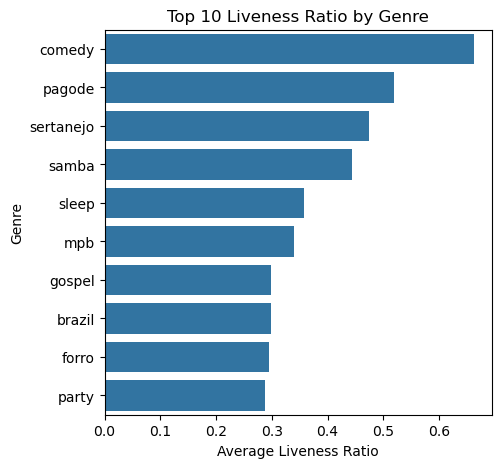

The genre with the highest liveness ratio is comedy with an average liveness ratio of 66.17%.


In [27]:
# Group the data by 'track_genre' and calculate the mean liveness for each genre
live_ratio_by_genre = df.groupby('track_genre')['liveness'].mean().reset_index()

# Get the top 10 genres with the highest liveness ratio
top10_live_genres = live_ratio_by_genre.nlargest(10, 'liveness')

# Find the genre with the highest liveness ratio
most_live_genre = live_ratio_by_genre.loc[live_ratio_by_genre['liveness'].idxmax()]

# Set the figure size to 5x5 inches
plt.figure(figsize=(5, 5))

# Create a bar plot for the top 10 genres with the highest liveness ratio
sns.barplot(
    x='liveness',  # Set the x-axis to 'liveness' column
    y='track_genre',  # Set the y-axis to 'track_genre' column
    data=top10_live_genres  # Use the dataset 'top10_live_genres'
)

# Set the title of the plot
plt.title('Top 10 Liveness Ratio by Genre')

# Label the x-axis
plt.xlabel('Average Liveness Ratio')

# Label the y-axis
plt.ylabel('Genre')

# Display the plot
plt.show()

# Print the genre with the highest liveness ratio
print(f"The genre with the highest liveness ratio is {most_live_genre['track_genre']} with an average liveness ratio of {most_live_genre['liveness']:.2%}.")


## Visualizing the top 10 genres associated with the most popular artists:

### Purpose of this Code:
- Identifies the most popular artists based on their average song popularity.
- Determines which genres are most common among these top artists.
- Visualizes the distribution of genres to see trends in popular music.

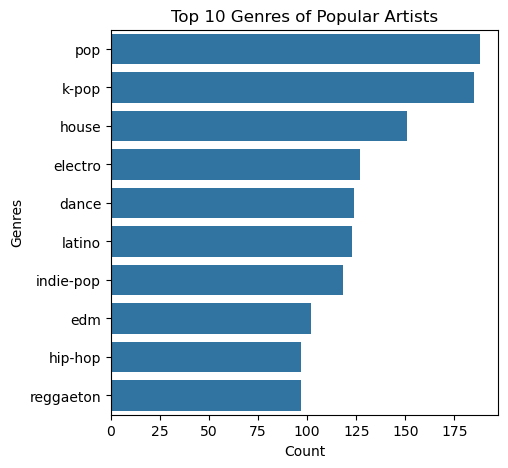

In [43]:
copy_df = df.copy() 
# Calculate the average popularity for each artist
top_artists = copy_df.groupby('artists')['popularity'].mean()

# Filter out artists with an average popularity score of 70 or higher
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)

# Extract a list of the most popular artists
top_artists_list = top_artists.index.tolist()

# Count the occurrences of genres among the most popular artists
genres_artists = df[df['artists'].isin(top_artists_list)]['track_genre'].value_counts().head(10)

# Set the figure size to 5x5 inches
plt.figure(figsize=(5, 5))

# Create a bar plot for the top 10 genres of popular artists
sns.barplot(
    x=genres_artists.values,  # Set the x-axis to the genre counts
    y=genres_artists.index  # Set the y-axis to genre names
)

# Set the title of the plot
plt.title('Top 10 Genres of Popular Artists')

# Label the x-axis
plt.xlabel('Count')

# Label the y-axis
plt.ylabel('Genres')

# Display the plot
plt.show()

### What is Histogram?

In [ ]:
A histogram is a type of bar chart that represents the distribution of numerical data. 
It groups data into bins (intervals) andshows how frequently values appear in each bin.
## Purpose:
- How popularity scores are distributed?
- Whether most songs are highly popular, moderately popular, or unpopular.
- If there are any peaks (common popularity scores) or gaps (less frequent scores).

## What is a KDE (Kernel Density Estimate) Curve?

In [ ]:
A Kernel Density Estimate (KDE) curve is a smooth line that represents the probability distribution of a dataset.
It is an alternative to a histogram but provides a continuous estimation of the underlying distribution.

## Why Use a KDE Curve?

In [ ]:
- Helps visualize the shape of the distribution more clearly.
- Unlike histograms (which depend on bin sizes), KDE provides a smooth estimate.
- Useful for detecting peaks and trends in data.

## How It Works?

In [ ]:
KDE works by using a kernel (a smoothing function, typically a Gaussian curve) to estimate the probability 
density at each point. It sums these small curves to create a smooth overall distribution.

## Analyzing the Distribution of Popularity Scores:

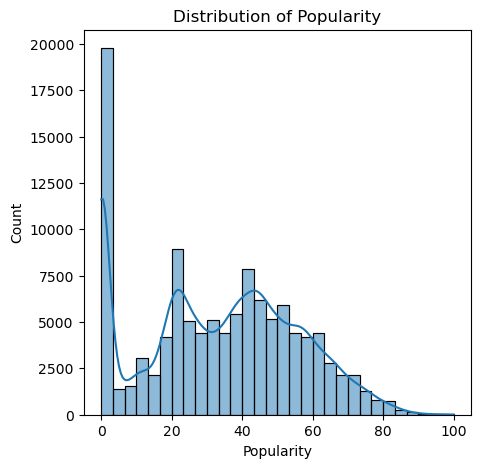

,Popularity,Count
0,0,16020
1,1,2140
2,2,1036
3,3,585
4,4,389
...,...,...
96,96,7
97,97,8
98,98,7
99,99,1


In [52]:
# Set the figure size to ensure better readability
plt.figure(figsize=(5, 5))

# Create a histogram for the 'popularity' column with 30 bins and a KDE (Kernel Density Estimate) curve
sns.histplot(df['popularity'], bins=30, kde=True)

# Add a title to the histogram
plt.title("Distribution of Popularity")

# Label the x-axis
plt.xlabel("Popularity")

# Label the y-axis
plt.ylabel("Count")

# Display the histogram
plt.show()

# Create a table showing the count of each unique popularity score
popularity_table = df['popularity'].value_counts().sort_index().reset_index()

# Rename the columns for better readability
popularity_table.columns = ['Popularity', 'Count']

# Display the popularity table
popularity_table

## 1.What is Correlation?

In [ ]:
Correlation measures the relationship between two numerical variables.
    
A positive correlation means that as one variable increases, the other also increases.
A negative correlation means that as one variable increases, the other decreases.
A weak or no correlation means there is little to no relationship between the two variables.

## Why Analyze Correlation Between Energy and Loudness?

In [ ]:
- Energy and loudness are closely related in music.
- Louder songs tend to feel more energetic because of their high amplitude.
- This analysis helps us understand if louder tracks generally have higher energy.

## How Will We Visualize This?

In [ ]:
- We will use a regression plot (scatter plot with a trend line) to see the relationship.
- A line sloping upwards means a positive correlation (louder songs tend to have more energy).
- A flat or downward-sloping line suggests no or negative correlation.

## Correlation Analysis of Energy vs Loudness

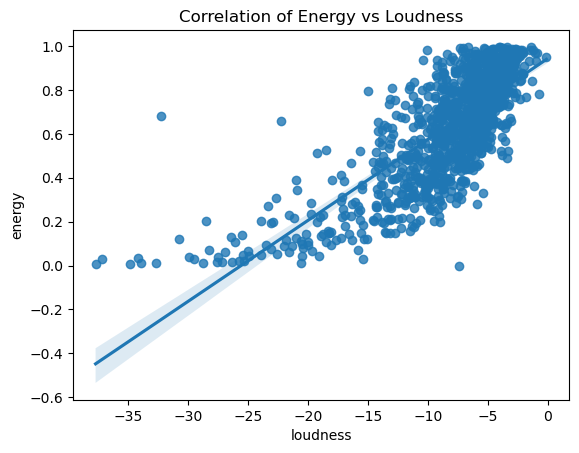

In [56]:
# Take a random sample of 1% of the dataset to optimize performance
sample = df.sample(int(0.01 * len(df)))

# Create a regression plot to analyze the correlation between loudness and energy
sns.regplot(
    data=sample,  # Use the sampled dataset
    y="energy",  # Set energy as the y-axis variable
    x="loudness"  # Set loudness as the x-axis variable
)

# Set the title of the plot
plt.title("Correlation of Energy vs Loudness")

# Display the plot
plt.show()


## Purpose of this code:

In [ ]:
✅ Visualizes the relationship between energy and loudness
✅ Uses a random sample to improve performance
✅ Shows a regression trend line to analyze correlation

## Analysis of Loudness vs Energy in the Top 3 Popular Music Genres

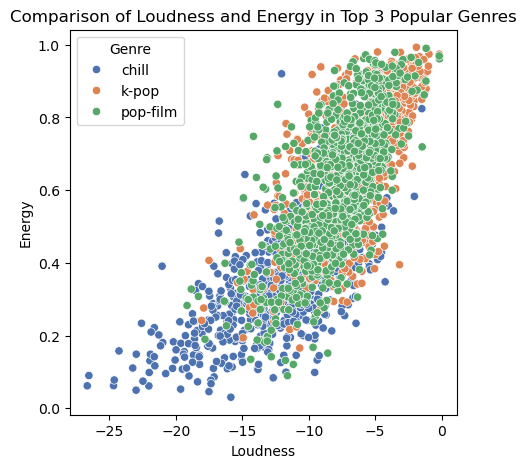

In [65]:
# Calculate the average popularity for each genre
avg_popularity_by_genre = df.groupby('track_genre')['popularity'].mean().reset_index()

# Select the top 3 genres with the highest average popularity
top3_popular_genres = avg_popularity_by_genre.nlargest(3, 'popularity')

# Filter the dataset to include only the songs from these top 3 genres
top3_genre_data = df[df['track_genre'].isin(top3_popular_genres['track_genre'])]

# Set the figure size to improve readability
plt.figure(figsize=(5, 5))

# Create a scatter plot showing the relationship between loudness and energy
sns.scatterplot(
    x='loudness',  # X-axis represents loudness
    y='energy',  # Y-axis represents energy
    hue='track_genre',  # Color by genre
    data=top3_genre_data,  # Use the filtered dataset
    palette='deep'  # Use a distinct color palette
)

# Add a title to the plot
plt.title('Comparison of Loudness and Energy in Top 3 Popular Genres')

# Label the x-axis
plt.xlabel('Loudness')

# Label the y-axis
plt.ylabel('Energy')

# Add a legend to identify genres
plt.legend(title='Genre')

# Display the plot
plt.show()

## Purpose of this code:

In [ ]:
✅ It calculates the average popularity of each genre.
✅ It selects the top 3 genres based on their average popularity scores.
✅ It extracts only the songs that belong to the top 3 most popular genres.
✅ It creates a scatter plot where:
    X-axis = Loudness
    Y-axis = Energy
    Hue (color) = Different genres
✅ This helps compare how different genres balance loudness and energy.

## Introduction to Explicit and Non-Explicit Content in Music:

In [ ]:
In the music industry, explicit content refers to songs that contain strong language, violence, drug references, 
or other mature themes. These songs are often labeled with an "Explicit" tag to warn listeners, especially younger audiences.
On the other hand, non-explicit (clean) content includes songs that are free from such material and are generally suitable for all audiences.

## Why Analyze Explicit Content?

In [ ]:
- Helps understand the distribution of explicit vs. non-explicit songs in the dataset.
- Useful for playlist curation, content moderation, and audience targeting.
- Can provide insights into genre trends—some genres may have a higher percentage of explicit content than others.

## Analysis of Explicit Content in Songs

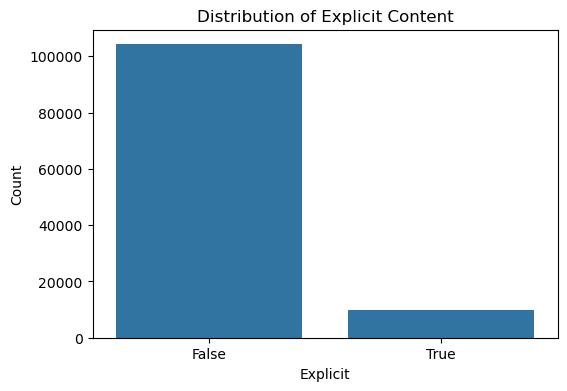

,Explicit,Count
0,False,104253
1,True,9747


In [69]:
# Set the figure size for better readability
plt.figure(figsize=(6, 4))

# Create a count plot to show the distribution of explicit content
sns.countplot(x=df['explicit'])

# Add a title to the plot
plt.title("Distribution of Explicit Content")

# Label the x-axis
plt.xlabel("Explicit")

# Label the y-axis
plt.ylabel("Count")

# Display the plot
plt.show()

# Create a table showing the count of explicit vs. non-explicit songs
explicit_count_table = df['explicit'].value_counts().reset_index()

# Rename the columns for clarity
explicit_count_table.columns = ['Explicit', 'Count']

# Display the table
explicit_count_table

## Purpose of this code:

In [ ]:
- To analyze the number of explicit and non-explicit songs.
- To help understand how common explicit content is in the dataset.

## Introduction to Time Signature in Music:

In [ ]:
In music theory, a time signature represents how beats are grouped within a measure. It is usually written
as a fraction (e.g., 4/4, 3/4, 6/8), where:

- The top number indicates how many beats are in a measure.
- The bottom number specifies the note value that represents one beat.

## Why Analyze Time Signature?

In [ ]:
- Helps identify the most common rhythmic structures in the dataset.
- Useful for genre-based analysis (some genres prefer certain time signatures).
- Can aid music recommendation systems to group songs by rhythmic feel.

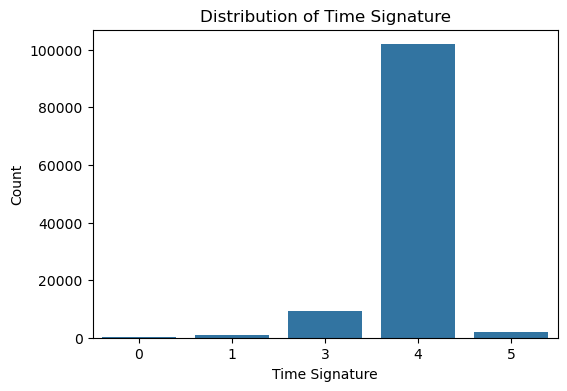

,Time Signature,Count
0,4,101843
1,3,9195
2,5,1826
3,1,973
4,0,163


In [76]:
# Set figure size for better visibility
plt.figure(figsize=(6, 4))

# Create a count plot for 'time_signature' column to visualize its distribution
sns.countplot(x=df['time_signature'])

# Add title and labels to the plot
plt.title("Distribution of Time Signature")
plt.xlabel("Time Signature")
plt.ylabel("Count")

# Display the plot
plt.show()

# Create a table to show count of each unique time signature value
time_signature_count_table = df['time_signature'].value_counts().reset_index()

# Rename columns for better understanding
time_signature_count_table.columns = ['Time Signature', 'Count']

# Display the table
time_signature_count_table


## Visualizing Feature Correlations with a Heatmap

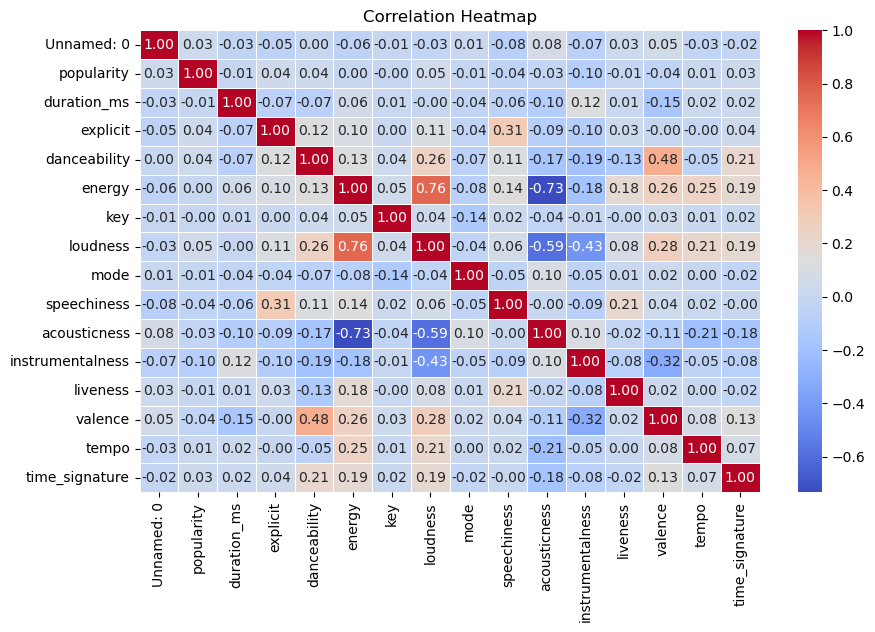

In [78]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create a heatmap to visualize the correlation between numerical features
# - 'annot=True' displays correlation values on the heatmap
# - 'fmt=".2f"' ensures values are formatted to two decimal places
# - 'cmap="coolwarm"' applies a color scheme for better interpretation
# - 'linewidths=0.5' adds separation lines between cells for clarity
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

# Add a title to the heatmap
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


## Visualizing Relationships Between Audio Features and Popularity

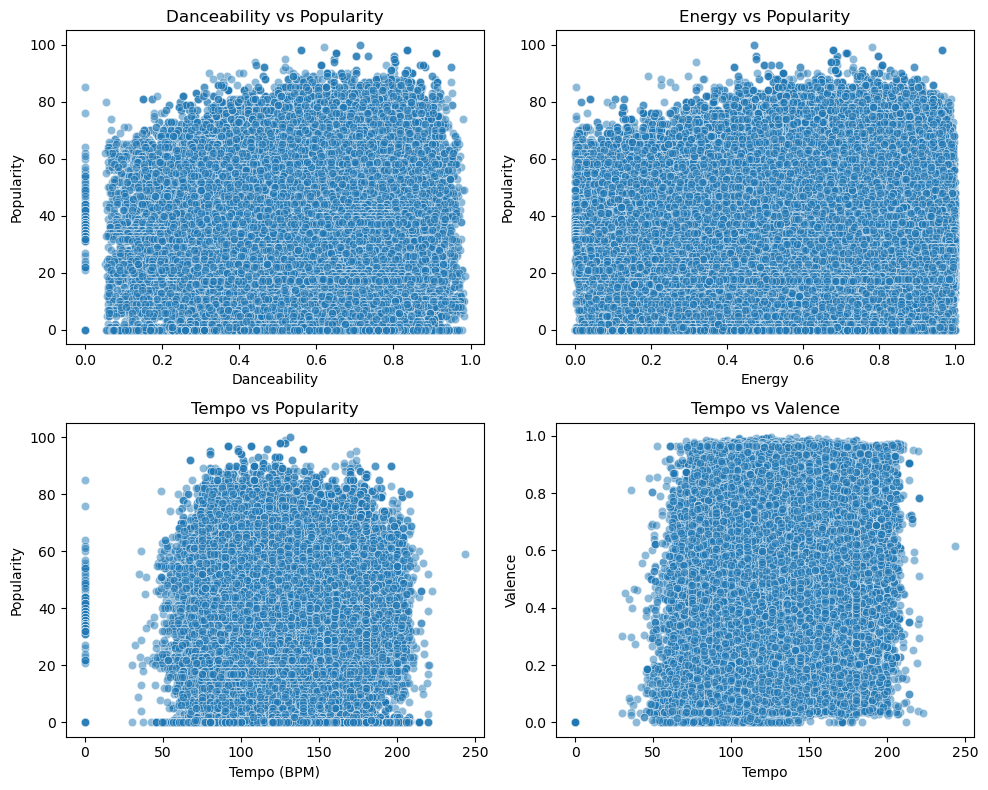

In [84]:
# Create a 2x2 grid of subplots for visualizing four different relationships
fig, axes = plt.subplots(2, 2, figsize=(10, 8))  # Set figure size

# Danceability vs Popularity
sns.scatterplot(x=df["danceability"], y=df["popularity"], alpha=0.5, ax=axes[0, 0])  # Create scatter plot
axes[0, 0].set_title("Danceability vs Popularity")  # Set subplot title
axes[0, 0].set_xlabel("Danceability")  # Set x-axis label
axes[0, 0].set_ylabel("Popularity")  # Set y-axis label

# Energy vs Popularity
sns.scatterplot(x=df["energy"], y=df["popularity"], alpha=0.5, ax=axes[0, 1])  # Create scatter plot
axes[0, 1].set_title("Energy vs Popularity")  # Set subplot title
axes[0, 1].set_xlabel("Energy")  # Set x-axis label
axes[0, 1].set_ylabel("Popularity")  # Set y-axis label

# Tempo vs Popularity
sns.scatterplot(x=df["tempo"], y=df["popularity"], alpha=0.5, ax=axes[1, 0])  # Create scatter plot
axes[1, 0].set_title("Tempo vs Popularity")  # Set subplot title
axes[1, 0].set_xlabel("Tempo (BPM)")  # Set x-axis label
axes[1, 0].set_ylabel("Popularity")  # Set y-axis label

# Tempo vs Valence
sns.scatterplot(x=df["tempo"], y=df["valence"], alpha=0.5, ax=axes[1, 1])  # Create scatter plot
axes[1, 1].set_title("Tempo vs Valence")  # Set subplot title
axes[1, 1].set_xlabel("Tempo")  # Set x-axis label
axes[1, 1].set_ylabel("Valence")  # Set y-axis label

# Adjust layout for better spacing
plt.tight_layout()

# Display all plots
plt.show()


## Purpose of this Code

In [ ]:
This code aims to visualize relationships between different audio features and song popularity using scatter plots.
It creates a 2x2 grid of subplots, each showing how a specific feature correlates with popularity or valence.

## Key Insights the Code Helps Analyze:
Danceability vs. Popularity – Determines if highly danceable songs tend to be more popular.
Energy vs. Popularity – Checks whether energetic songs have higher popularity.
Tempo vs. Popularity – Evaluates if the speed (BPM) of a song impacts its popularity.
Tempo vs. Valence – Analyzes if a songs speed influences its mood (valence).